## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 25]
MOMENTUM = 0.95

In [7]:
results = {}
for drop in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    print("Experiment with Dropout rate-%s" % (str(drop)))
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=drop, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    exp_name_tag = "exp-%s" % (str(drop))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc} 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
____________________________________________

50000/50000 [==============================] - 193s 4ms/step - loss: 2.1505 - accuracy: 0.2177 - val_loss: 2.1116 - val_accuracy: 0.2626
Epoch 43/50
50000/50000 [==============================] - 193s 4ms/step - loss: 2.1560 - accuracy: 0.2108 - val_loss: 2.0981 - val_accuracy: 0.2668
Epoch 44/50
50000/50000 [==============================] - 193s 4ms/step - loss: 2.1541 - accuracy: 0.2157 - val_loss: 2.1179 - val_accuracy: 0.2608
Epoch 45/50
50000/50000 [==============================] - 192s 4ms/step - loss: 2.1509 - accuracy: 0.2147 - val_loss: 2.1299 - val_accuracy: 0.2516
Epoch 46/50
50000/50000 [==============================] - 193s 4ms/step - loss: 2.1558 - accuracy: 0.2145 - val_loss: 2.0771 - val_accuracy: 0.2680
Epoch 47/50
50000/50000 [==============================] - 194s 4ms/step - loss: 2.1532 - accuracy: 0.2157 - val_loss: 2.0656 - val_accuracy: 0.2769
Epoch 48/50
50000/50000 [==============================] - 194s 4ms/step - loss: 2.1520 - accuracy: 0.2182 - val_loss:

Epoch 37/50
50000/50000 [==============================] - 24s 488us/step - loss: 1.1981 - accuracy: 0.5779 - val_loss: 1.4558 - val_accuracy: 0.4946
Epoch 38/50
50000/50000 [==============================] - 25s 500us/step - loss: 1.1991 - accuracy: 0.5762 - val_loss: 1.4212 - val_accuracy: 0.5023
Epoch 39/50
50000/50000 [==============================] - 25s 503us/step - loss: 1.1835 - accuracy: 0.5839 - val_loss: 1.3815 - val_accuracy: 0.5215
Epoch 40/50
50000/50000 [==============================] - 25s 507us/step - loss: 1.1843 - accuracy: 0.5829 - val_loss: 1.4055 - val_accuracy: 0.5123
Epoch 41/50
50000/50000 [==============================] - 25s 496us/step - loss: 1.1983 - accuracy: 0.5763 - val_loss: 1.3959 - val_accuracy: 0.5149
Epoch 42/50
50000/50000 [==============================] - 25s 491us/step - loss: 1.1853 - accuracy: 0.5834 - val_loss: 1.4412 - val_accuracy: 0.4965
Epoch 43/50
50000/50000 [==============================] - 25s 493us/step - loss: 1.1687 - accuracy:

Epoch 32/50
50000/50000 [==============================] - 13s 266us/step - loss: 1.0264 - accuracy: 0.6409 - val_loss: 1.4405 - val_accuracy: 0.5025
Epoch 33/50
50000/50000 [==============================] - 14s 272us/step - loss: 1.0185 - accuracy: 0.6452 - val_loss: 1.4360 - val_accuracy: 0.5110
Epoch 34/50
50000/50000 [==============================] - 13s 270us/step - loss: 1.0016 - accuracy: 0.6498 - val_loss: 1.4365 - val_accuracy: 0.5045
Epoch 35/50
50000/50000 [==============================] - 13s 263us/step - loss: 0.9872 - accuracy: 0.6547 - val_loss: 1.4653 - val_accuracy: 0.5020
Epoch 36/50
50000/50000 [==============================] - 13s 262us/step - loss: 0.9807 - accuracy: 0.6584 - val_loss: 1.4446 - val_accuracy: 0.5046
Epoch 37/50
50000/50000 [==============================] - 13s 266us/step - loss: 0.9611 - accuracy: 0.6636 - val_loss: 1.4359 - val_accuracy: 0.5100
Epoch 38/50
50000/50000 [==============================] - 13s 264us/step - loss: 0.9567 - accuracy:

Epoch 27/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.2391 - accuracy: 0.5720 - val_loss: 1.4885 - val_accuracy: 0.4816
Epoch 28/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.2275 - accuracy: 0.5733 - val_loss: 1.4865 - val_accuracy: 0.4840
Epoch 29/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.2161 - accuracy: 0.5768 - val_loss: 1.4851 - val_accuracy: 0.4801
Epoch 30/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.2083 - accuracy: 0.5822 - val_loss: 1.4889 - val_accuracy: 0.4761
Epoch 31/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1967 - accuracy: 0.5842 - val_loss: 1.4805 - val_accuracy: 0.4811
Epoch 32/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.1856 - accuracy: 0.5898 - val_loss: 1.4777 - val_accuracy: 0.4848
Epoch 33/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.1751 - accuracy: 0.5937

Epoch 22/50
50000/50000 [==============================] - 17s 344us/step - loss: 1.1867 - accuracy: 0.5853 - val_loss: 1.3834 - val_accuracy: 0.5124
Epoch 23/50
50000/50000 [==============================] - 17s 344us/step - loss: 1.1736 - accuracy: 0.5874 - val_loss: 1.4117 - val_accuracy: 0.5091
Epoch 24/50
50000/50000 [==============================] - 17s 342us/step - loss: 1.1590 - accuracy: 0.5916 - val_loss: 1.4166 - val_accuracy: 0.5100
Epoch 25/50
50000/50000 [==============================] - 17s 342us/step - loss: 1.1493 - accuracy: 0.5960 - val_loss: 1.4254 - val_accuracy: 0.5070
Epoch 26/50
50000/50000 [==============================] - 17s 335us/step - loss: 1.1451 - accuracy: 0.5975 - val_loss: 1.4062 - val_accuracy: 0.5071
Epoch 27/50
50000/50000 [==============================] - 17s 338us/step - loss: 1.1231 - accuracy: 0.6059 - val_loss: 1.4165 - val_accuracy: 0.5072
Epoch 28/50
50000/50000 [==============================] - 17s 342us/step - loss: 1.1081 - accuracy:

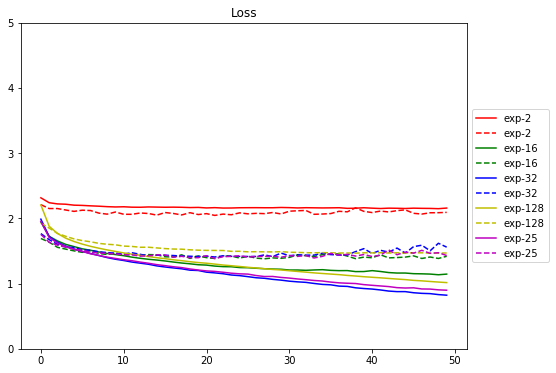

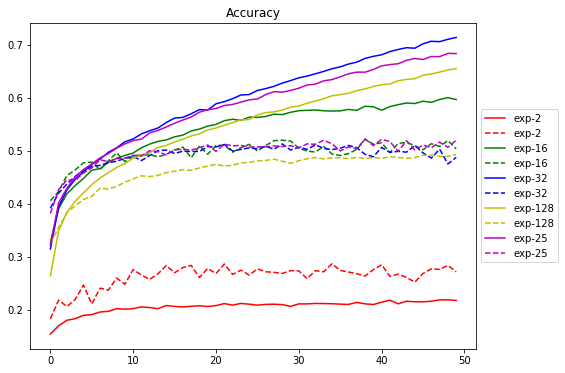

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k","c","lime","tomato"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
#plt.legend(handles=[line_up, line_down])
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
#plt.legend()
plt.show()